# Enhanced Gradient Methods

This notebook was done by David Refaeli all the credits to him.

Comprenhensive comparison of gradient methods used in Deep Learning.

![](https://i.imgur.com/2dKCQHh.gif)
![](https://www.ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif)
![](https://aiplanet.com/blog/wp-content/uploads/2021/04/Saddle-Point-Imgur.gif)

Let's implement and visualize the different variants of SGD. Like always we start by loading the necessary libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

For nicer plotting:

In [ ]:
plt.rcParams['figure.dpi'] = 120  # set plotting dpi

Let's plot the contour plot of the following objective function:

$$f(x,y) = \frac{x^2}{10} + y^2
$$

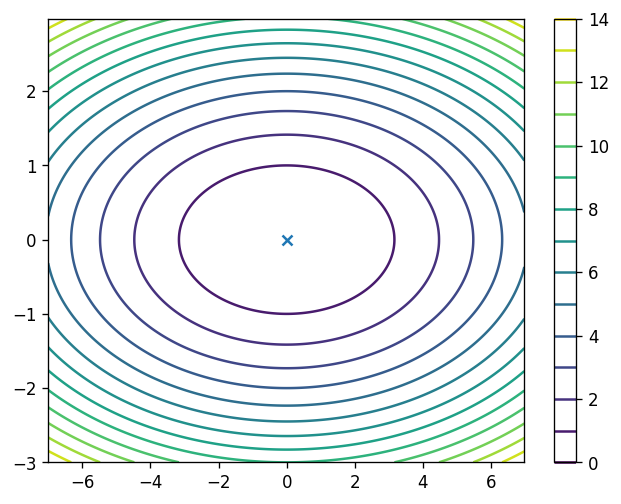

In [ ]:
delta = 0.025
x = np.arange(-7.0, 7.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2/10 + Y**2
fig = plt.contour(X, Y, Z, 15)
colorbar = plt.colorbar(fig, orientation='vertical')
plt.scatter(0, 0, marker="x") # x marks the spot (the true global minima)

This function has a very tractable gradient:

$$ \nabla f= (x/5, 2y)
$$

And a closed form / analytical minima at $(x,y) = (0,0)$. Never the less, we will use it to demonstrate gradient descent variants.

Let's code the gradient function:

In [ ]:
def grad(x):
  return np.array([[x[0,0]/5, 2*x[0,1]]])

For sake of visualization I made the following function. It will plot the arrows from the starting point to the end point of the optimization.

In [ ]:
# cycle colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [ ]:
# take a list containing trajectories (arrays of points) and plot each trajectory with its own color
def plot_gd(ps, labels):
  plt.figure(figsize=(10,6))
  plt.contour(X, Y, Z, 15)
  l1 = ps[0].shape[0]
  l2 = len(ps)
  for i in range(1, l1):
    for j in range(l2):
      col = colors[j % len(colors)]
      x = ps[j]
      arr = plt.arrow(x[i-1,0], x[i-1,1], x[i,0]-x[i-1,0], x[i,1]-x[i-1,1],
                      length_includes_head=True, head_width=0.075, fc=col, ec=col)
  plt.legend(labels)

### Gradient Descent

The 'vanilla' gradient descent algorithm is very simple:
$$
    \theta_{t+1} = \theta_{t} - \eta \nabla J(\theta_t)
$$

In [ ]:
def gd(x, lr):
  return x - lr*grad(x)

The starting point will be $(x,y)=(-6,-2)$. The Learning Rate / Step will be equal to $1$.

In [ ]:
x0 = np.array([-6.,-2.]) # starting point
lr = 1

Now let's do 'vanilla' gradient descent:

In [ ]:
x_gd = np.array([x0])
for i in range(10):
  x_new = gd(x_gd[[i]], lr)
  x_gd = np.append(x_gd, x_new, axis=0)

### Momentum

Momemtum is defined as

$$
\mu_t = \beta \mu_{t-1} + \eta \nabla_\theta J(\theta)\\
\theta_{t+1} = \theta_t - \mu_t
$$

In [ ]:
# paper definition
def momentum(x, mu, lr, beta): #Recive mu anterior
    #mu_t
    mu = 1 #Hacer codigo aqui
    x_new = x - mu # new point, GD + Momentum
    return x_new, mu

In [ ]:
x_mom = np.array([x0]) # starting point
mu = np.array([[0., 0.]]) # momentum
beta = 0.3
for i in range(10):
  x_new, mu = momentum(x_mom[[i]], mu, lr, beta)
  x_mom = np.append(x_mom, x_new, axis=0)

Text(0.5, 1.0, 'GD variants, LR=1')

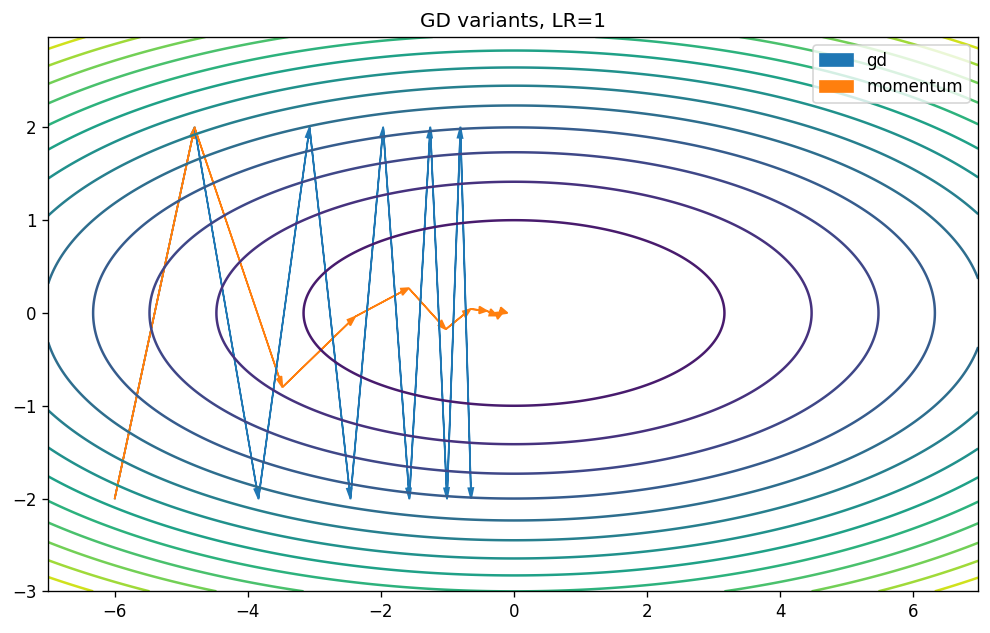

In [ ]:
plot_gd([x_gd, x_mom], ['gd', 'momentum'])
plt.title(f'GD variants, LR={lr}')

We see that for "vanilla" GD, there is oscillation in the $y$-axis, which prevents the algorithm from reaching the true optimum, although it does seem to converge in the $x$-axis. For momentum, on the other hand, we see the algorithm does manages to break away from the oscillation in the $y$-axis, and converge to a better location.

### Nesterov Accelerated Gradient (NAG)
The velocity is $\mu$ and $x_{pure} = x-\beta \mu$. The new velocity is calculated as
$$ \mu_t = \beta \mu_{t-1} + \eta \nabla f(x_{pure})$$
Finally, the new value of the parameters' vector is:
$$ x = x-\mu_{t} .$$

In [ ]:
def nag(x, mu, lr, beta):
    pass
    #Hacer codigo aqui
    #x_pure =
    #mu =
    #x_new = x - # new point, GD + Momentum
    #return x_new, mu

In [ ]:
x_nag = np.array([x0]) # starting point
mu = np.array([[0., 0.]]) # momentum/nag
for i in range(10):
  x_new, mu = nag(x_nag[[i]], mu, lr, beta)
  x_nag = np.append(x_nag, x_new, axis=0)

(-3.0, 3.0)

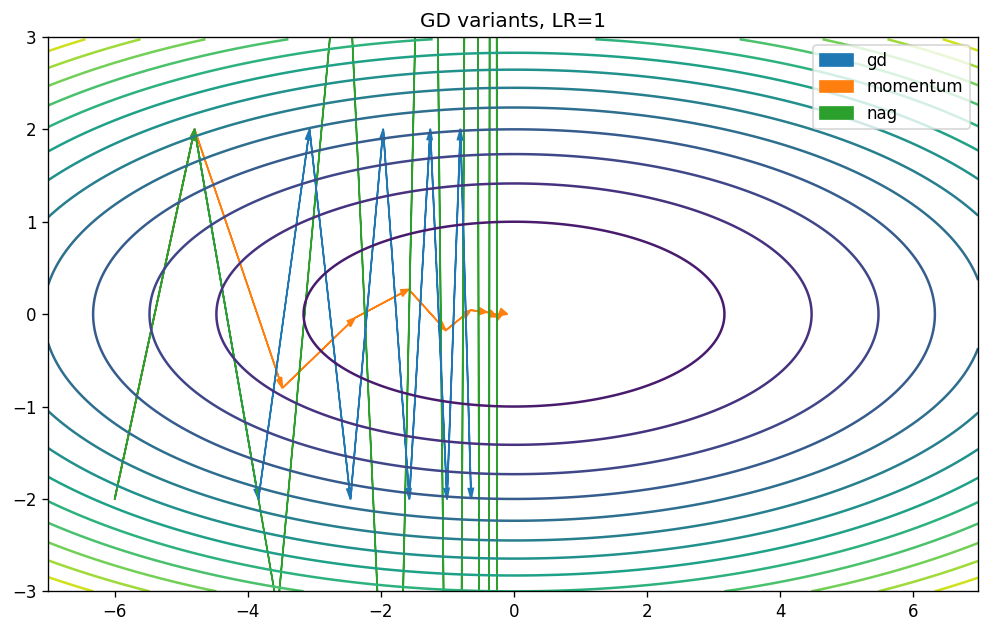

In [ ]:
plot_gd([x_gd, x_mom, x_nag], ['gd', 'momentum', 'nag'])
plt.title(f'GD variants, LR={lr}')
plt.ylim([-3,3])

For this specific problem, with a $lr=1$, NAG is actually starting to diverge. Let's repeat the experiments, only this time with a smaller learning rate, and a more realistic $\beta=0.9$.

In [ ]:
lr = 0.2
beta = 0.9

In [ ]:
x_gd = np.array([x0])
x_mom = np.array([x0]) # starting point
x_nag = np.array([x0]) # starting point
mu_mom = np.array([0., 0.]) # momentum
mu_nag = np.array([0., 0.]) # NAG momentum

for i in range(10):
  x_new = gd(x_gd[[i]], lr)
  x_gd = np.append(x_gd, x_new, axis=0)

  x_new, mu_mom = momentum(x_mom[[i]], mu_mom, lr, beta)
  x_mom = np.append(x_mom, x_new, axis=0)

  x_new, mu_nag = nag(x_nag[[i]], mu_nag, lr, beta)
  x_nag = np.append(x_nag, x_new, axis=0)

Text(0.5, 1.0, 'GD Variantes, LR=0.2')

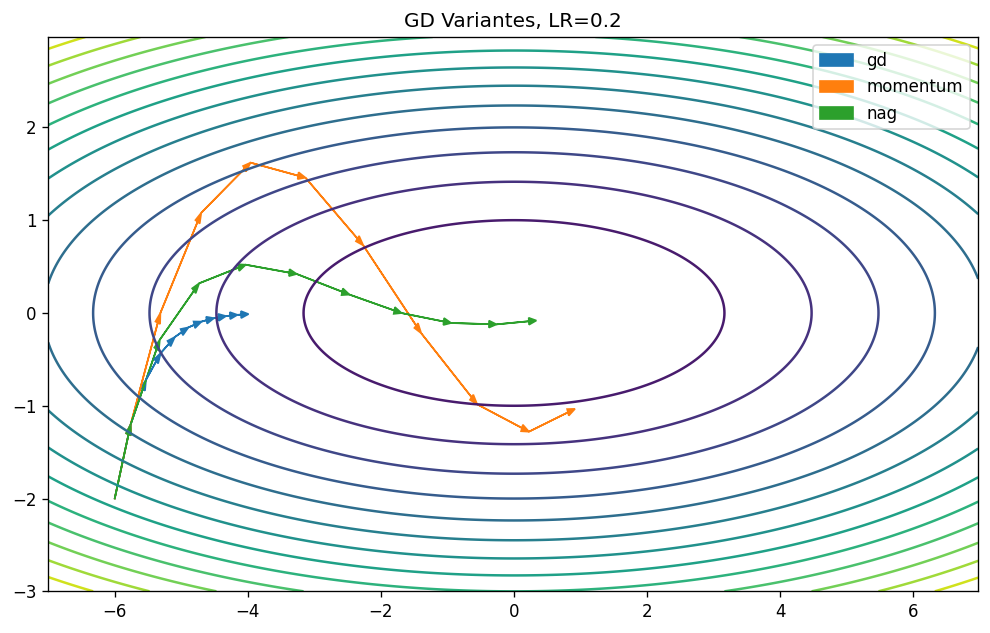

In [ ]:
plot_gd([x_gd, x_mom, x_nag], ['gd', 'momentum', 'nag'])
plt.title(f"GD Variantes, LR={lr}")

We see here that GD is slow to converge, momentum does build up speed, but overshoots a bit, while NAG builds up speed but also manages to "break" and "look ahead", making it arrive at a better location.

### AdaGrad
$$
    g_{t,i} = \nabla_\theta L(x_t; \theta_{t,i})\\
    G_{t,i} = \sum_{\tau=0}^t g_{\tau, i}^2\\
    \theta^+ = \theta - \frac{\eta}{\sqrt{G_{t,i} + \epsilon}} g_{t,i}
$$
initial_accumulator_value $:= \epsilon$

In [ ]:
def adagrad(x, v, lr, epsilon=1e-8):
    g = grad(x)
    v += g**2
    x_new = x - lr * g / (np.sqrt(v + epsilon))
    return x_new, v

In [ ]:
x_ag = np.array([x0]) # starting point
v = np.array([[0., 0.]]) # sum of squared gradients
for i in range(10):
  x_new, v = adagrad(x_ag[[i]], v, lr)
  x_ag = np.append(x_ag, x_new, axis=0)

### RMSprop

$$
E[g^2_t] = 0.9 E[g^2_{t-1}] + 0.1g^2_t \\
\text{RMS}(g_t) = \sqrt{E[g^2_t]+\epsilon} \\
\theta_{t+1} = \theta_t - \frac{\eta}{\text{RMS}(g_t)} g_t
$$

In [ ]:
def rmsprop(x, v, lr, beta=0.9, epsilon=1e-8):
    g = grad(x)
    v = beta*v + (1-beta)*g**2
    x_new = x - lr * g / (np.sqrt(v + epsilon))
    return x_new, v

In [ ]:
x_rmsp = np.array([x0]) # starting point
v = np.array([[0., 0.]]) # RMS (gradient^2)
for i in range(10):
  x_new, v = rmsprop(x_rmsp[[i]], v, lr)
  x_rmsp = np.append(x_rmsp, x_new, axis=0)

### AdaDelta

The AdaDelta takes a bit of time to warm up, due to its quantities starting at 0, and drived by the $\epsilon$. For this reason I placed a higher epsilon here:

$$
\Delta \theta_t = - \frac{\text{RMS}(\Delta \theta_{t-1})}{\text{RMS}(g_t)} g_t \\
\theta_{t+1} = \theta_t +\Delta \theta_t
$$


In [ ]:
def adadelta(x, v1, v2, beta=0.9, epsilon=1e-3):
    g = grad(x)
    v1 = beta * v1 + (1 - beta) * g**2
    dx = (np.sqrt(v2 + epsilon) / np.sqrt(v1 + epsilon)) * g
    v2 = beta * v2 + (1 - beta) * dx**2
    x_new = x - dx
    return x_new, v1, v2

In [ ]:
x_ad = np.array([x0]) # starting point
v1 = np.array([[0., 0.]]) # RMS (gradient^2)
v2 = np.array([[0., 0.]]) # RMS (dx^2)
for i in range(10):
  x_new, v1, v2 = adadelta(x_ad[[i]], v1, v2)
  x_ad = np.append(x_ad, x_new, axis=0)

### Adam
https://arxiv.org/pdf/1412.6980.pdf see improved algorithm at the end of section 2.
$$
    m_t = \beta_1 m_{t-1} + (1-\beta_1) \nabla_\theta L(x_t; \theta_t)\\
    v_t = \beta_2 v_{t-1} + (1-\beta_2) \left(\nabla_\theta L(x_t; \theta_t)\right) ^2\\
    \eta_t = \eta * \frac{\sqrt{1-\beta_2^t}}{1-\beta_1^t}
$$
$$
    \theta_{t+1} = \theta_t - \frac{\eta_t}{\sqrt{v_t} + \epsilon}m_t
$$

In [ ]:
def adam(x, m, v, lr, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
    g = grad(x)
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * g**2
    m_hat = m / (1 - beta1**(t+1))
    v_hat = v / (1 - beta2**(t+1))
    x_new = x - lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return x_new, m, v

In [ ]:
x_adam = np.array([x0]) # starting point
m = np.array([[0., 0.]]) # momentum
v = np.array([[0., 0.]]) # RMSprop
for i in range(10):
  x_new, m, v = adam(x_adam[[i]], m, v, lr, i)
  x_adam = np.append(x_adam, x_new, axis=0)

### AdaMax

In [ ]:
def adamax(x, m, u, i, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
    g = grad(x)
    m = beta1 * m + (1 - beta1) * g
    m_hat = m / (1 - beta1**(i+1))
    u = np.maximum(beta2 * u, np.abs(g))
    x_new = x - lr * m_hat / (u + epsilon)
    return x_new, m, u

In [ ]:
x_adamax = np.array([x0]) # starting point
m = np.array([[0., 0.]]) # momentum
u = np.array([[0., 0.]]) # l-infinity norm
for i in range(10):
  x_new, m, u = adamax(x_adamax[[i]], m, u, i, lr)
  x_adamax = np.append(x_adamax, x_new, axis=0)

### Nadam

In [ ]:
def nadam(x, m, v, t, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
    g = grad(x)
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * g**2
    m_hat = beta1 * m / (1 - beta1**(t+2)) + (1-beta1)*g / (1-beta1**(t+1))
    v_hat = v / (1 - beta2**(t+1))
    x_new = x - lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return x_new, m, v

In [ ]:
x_nad = np.array([x0]) # starting point
m = np.array([[0., 0.]]) # momentum
v = np.array([[0., 0.]]) # RMSprop
for i in range(10):
  x_new, m, v = nadam(x_nad[[i]], m, v, i, lr)
  x_nad = np.append(x_nad, x_new, axis=0)

### Final Plots

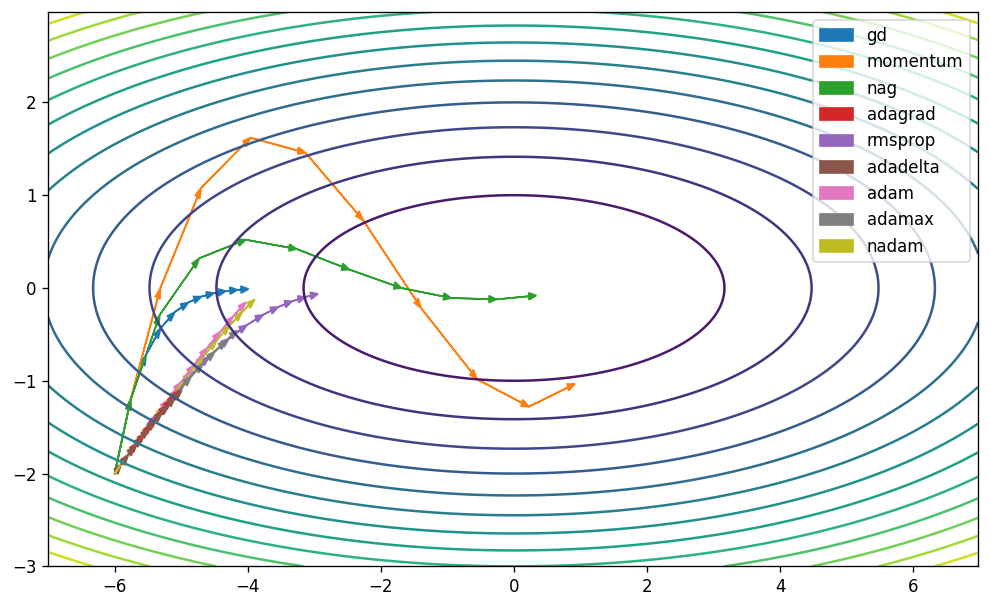

In [ ]:
plot_gd([x_gd, x_mom, x_nag, x_ag, x_rmsp, x_ad, x_adam, x_adamax, x_nad],
        ['gd', 'momentum', 'nag', 'adagrad', 'rmsprop', 'adadelta', 'adam', 'adamax', 'nadam'])

AdaGrad barely moves, due to the accumulation of the 2nd moments and the increase in the denominator. RMSprop seems to move more than AdaGrad, and is not stuck. Both momentum and NAG are ahead of it, but will probably overshoot and need to head back. AdaDelta, even with a large $\epsilon$ doesn't manage to fill the gap. Adam and Nadam are close by, with Nadam maybe a bit better than Adam. Adamax is far behind, close to adagrad and adadelta.

Let's repeat the experiments again, only with 20 steps instead of 10:

In [ ]:
x_gd = np.array([x0])
x_mom = np.array([x0])
x_nag = np.array([x0])
x_ag = np.array([x0])
x_rmsp = np.array([x0])
x_ad = np.array([x0])
x_adam = np.array([x0])
x_adamax = np.array([x0])
x_nad = np.array([x0])
mu_mom = np.array([0., 0.])
mu_nag = np.array([0., 0.])
v_ag = np.array([[0., 0.]])
v_rms = np.array([[0., 0.]])
v1 = np.array([[0., 0.]])
v2 = np.array([[0., 0.]])
m_adam = np.array([[0., 0.]])
v_adam = np.array([[0., 0.]])
m_amax = np.array([[0., 0.]])
u_amax = np.array([[0., 0.]])
m_nadam = np.array([[0., 0.]])
v_nad = np.array([[0., 0.]])

for i in range(20):
  x_new = gd(x_gd[[i]], lr)
  x_gd = np.append(x_gd, x_new, axis=0)

  x_new, mu_mom = momentum(x_mom[[i]], mu_mom, lr, beta)
  x_mom = np.append(x_mom, x_new, axis=0)

  x_new, mu_nag = nag(x_nag[[i]], mu_nag, lr, beta)
  x_nag = np.append(x_nag, x_new, axis=0)

  x_new, v_ag = adagrad(x_ag[[i]], v_ag, lr)
  x_ag = np.append(x_ag, x_new, axis=0)

  x_new, v_rms = rmsprop(x_rmsp[[i]], v_rms, lr)
  x_rmsp = np.append(x_rmsp, x_new, axis=0)

  x_new, v1, v2 = adadelta(x_ad[[i]], v1, v2)
  x_ad = np.append(x_ad, x_new, axis=0)

  x_new, m_adam, v_adam = adam(x_adam[[i]], m_adam, v_adam, lr, i)
  x_adam = np.append(x_adam, x_new, axis=0)

  x_new, m_amax, u_amax = adamax(x_adamax[[i]], m_amax, u_amax, i, lr)
  x_adamax = np.append(x_adamax, x_new, axis=0)

  x_new, m_nadam, v_nad = nadam(x_nad[[i]], m_nadam, v_nad, i, lr)
  x_nad = np.append(x_nad, x_new, axis=0)

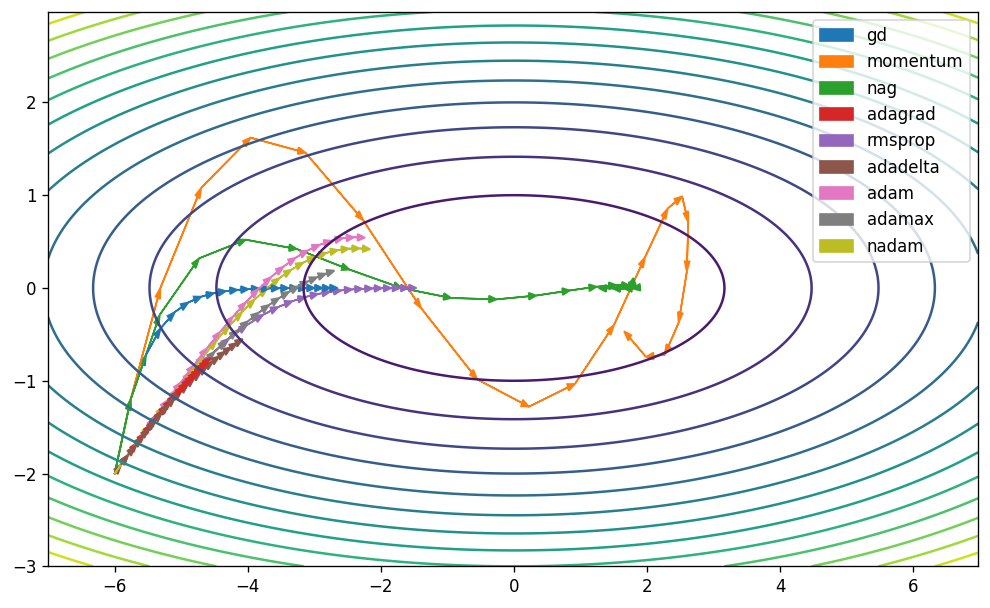

In [ ]:
plot_gd([x_gd, x_mom, x_nag, x_ag, x_rmsp, x_ad, x_adam, x_adamax, x_nad],
        ['gd', 'momentum', 'nag', 'adagrad', 'rmsprop', 'adadelta', 'adam', 'adamax', 'nadam'])

The closest "winners" for this specific problem seems to be NAG and RMS-prop.

Note that there are also some animated visualizations online, for example [this one](https://i.imgur.com/2dKCQHh.gif), [this](https://www.ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif), and [this](https://aiplanet.com/blog/wp-content/uploads/2021/04/Saddle-Point-Imgur.gif).

That's it for this tutorial. Hope this gave you some intuition into the different SGD variants that are commonly in use.

© David Refaeli 2023.